# Linear Regression

## Introduction

Predicting real estate valuation in Xindian District, New Taipei City, Taiwan.

Data is taken from [UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set).

_____
### Environment Setup
**Import Libraries**

In [1]:
# data array, analysis, and visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data split for training and testing, LR algorithm, and model metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Load Dataset**

In [2]:
# load dataset to 'house'
house = pd.read_csv('Realty.csv')

_____
### EDA
**Data Understanding**

In [3]:
# print first 5 records of 'house'
house.head()

,House Age,Distance to Metro,Convenience Stores,Latitude,Longitude,House Price
0,32.0,84.87882,10,24.98298,121.54024,379000
1,19.5,306.59470,9,24.98034,121.53951,422000
2,13.3,561.98450,5,24.98746,121.54391,473000
3,13.3,561.98450,5,24.98746,121.54391,548000
4,5.0,390.56840,5,24.97937,121.54245,431000


Data contains the following columns:
* 'House Age' - Age of house in years
* 'Distance to Metro' - Distance a house is from nearest metro in meters
* 'Convenience Stores' - Number of convenience stores within the vicinity
* 'Latitude' - Geographic coordinate in degrees
* 'Longitude' - Geographic coordinate in degrees
* 'House Price' - House price per unit area (New Taiwan Dollar / 3.3 meter squared)

In [4]:
# print data information
house.info()

# sums duplicated rows
house.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House Age           414 non-null    float64
 1   Distance to Metro   414 non-null    float64
 2   Convenience Stores  414 non-null    int64  
 3   Latitude            414 non-null    float64
 4   Longitude           414 non-null    float64
 5   House Price         414 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 19.5 KB


0

* Data contains 414 unique rows, with all attributes being numeric. There are also no missing values since each column has 414 entries, matching the total number of entries.

**Data Visualisations**

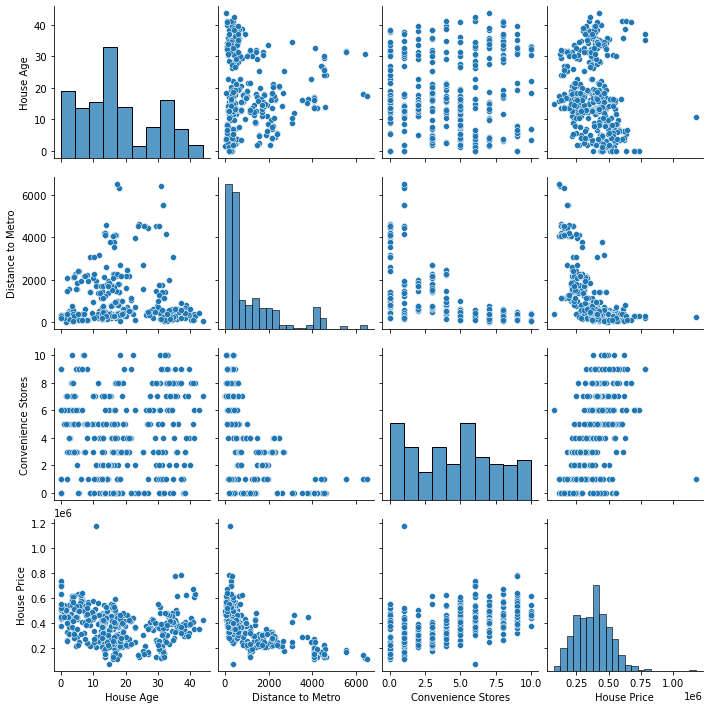

In [5]:
# pairplot for non-geographic attributes
sns.pairplot(house[['House Age', 'Distance to Metro', 'Convenience Stores', 'House Price']])

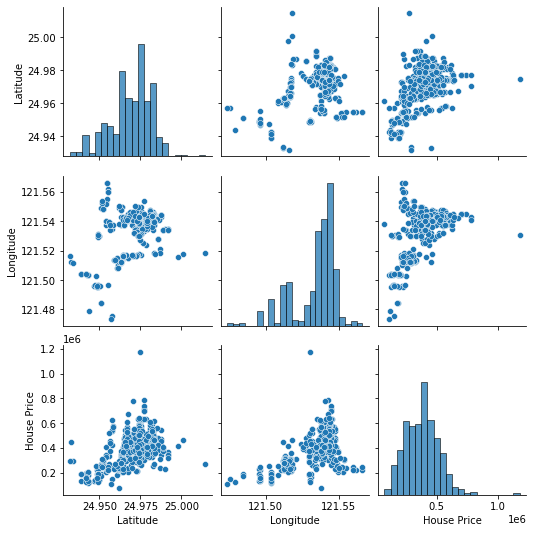

In [6]:
# pairplot for geographic attributes
sns.pairplot(house[['Latitude', 'Longitude', 'House Price']])

1. Correlations:
  * Notable correlations of attributes with `House Price` are the number of `Convenience Stores` (linear positive) and the `Distance to Metro` (exponential decay).
  * Geographic coordinates also has a positive correlation with house price.


2. Distributions:
  * Majority of the houses are close to a metro.
  * House prices are symmetrically distributed.

<AxesSubplot:>

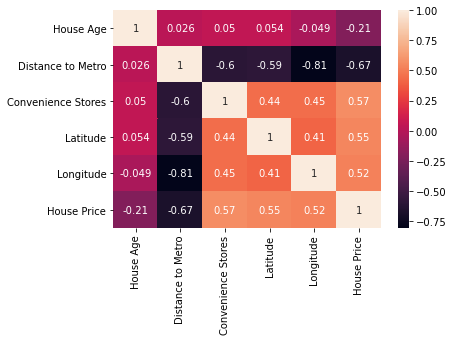

In [7]:
# correlation heatmap with annotations
sns.heatmap(house.corr(), annot=True)

- Heatmap implies that `Distance to Metro` has the strongest correlation to `House Price`.
- None of the attributes have a strong correlation with `House Price`: corr > 0.8

_____
### Train Linear Regression Model
**Set Predictor and Response Arrays**

In [8]:
# print data column names
house.columns

Index(['House Age', 'Distance to Metro', 'Convenience Stores', 'Latitude',
       'Longitude', 'House Price'],
      dtype='object')

In [9]:
# set predictor(X) and response(y) arrays
X = house[['House Age', 'Distance to Metro', 'Convenience Stores', 'Latitude',
       'Longitude']]

y = house['House Price']

**Train Test Split**

In [10]:
# split data - 70% train, 30% test with seed 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

**Train Model**

In [11]:
# create model
lm = LinearRegression()

# train model
lm.fit(X_train, y_train)

LinearRegression()

_____
### Evaluate Model
**Interpreting Model Parameters**

In [12]:
# print model intercept
print(lm.intercept_)

-29134975.483550243


In [13]:
# print model coefficients 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
House Age,-2491.631
Distance to Metro,-45.445
Convenience Stores,9881.770
Latitude,2445014.920
Longitude,-259030.966


Interpreting parameters:  
- When all variables are 0, house price is \$-29,134,975.
- When House Age increases by 1 unit, house price decreases by \$2,491.  
- When Distance to Metro increases by 1 unit, house price decreases by $45.  
- When Number of Convenience Stores increases by 1 unit, house price increases by \$9,881.  
- When Latitude increases by 1 unit, house price increases by \$2,445,014.  
- When Longitude increases by 1 unit, house price decreases by \$259,030.  

**Comparing Predicted Values**

R Squared:  0.6213285096123787
MAE: 62365.79886069581
MSE: 7002944885.227551
RMSE: 83683.59985820131


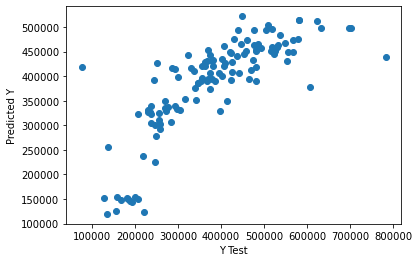

In [14]:
# test model
predictions = lm.predict(X_test)

# plot test and predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# print metrics
print('R Squared: ', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

_____
### Tuning Model
**Improving Model**

- Since we found out that `Distance to Metro` was decaying exponentially, we can transform it using log.
- Perform normalisation to prevent attributes of larger value from significantly influencing the outcome.

**Set arrays and normalise predictor values**

In [15]:
# log `Distance to Metro` values
house['Distance to Metro'] = np.log(house['Distance to Metro'])

# set predictor and response arrays for new model
X = house[['House Age', 'Distance to Metro', 'Convenience Stores', 'Latitude',
       'Longitude']]
y = house['House Price']

# perform z-score normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['House Age', 'Distance to Metro', 'Convenience Stores', 'Latitude',
       'Longitude'])

# print normalised X values
X_scaled.head()

,House Age,Distance to Metro,Convenience Stores,Latitude,Longitude
0,1.256,-1.744,2.007,1.125,0.449
1,0.157,-0.596,1.668,0.912,0.401
2,-0.388,-0.054,0.308,1.487,0.688
3,-0.388,-0.054,0.308,1.487,0.688
4,-1.117,-0.379,0.308,0.834,0.593


In [16]:
# print original X values
X.head()

,House Age,Distance to Metro,Convenience Stores,Latitude,Longitude
0,32.000,4.441,10,24.983,121.540
1,19.500,5.726,9,24.980,121.540
2,13.300,6.331,5,24.987,121.544
3,13.300,6.331,5,24.987,121.544
4,5.000,5.968,5,24.979,121.542


**Train Test Split and Train Model**

In [17]:
# split data - 70% train, 30% test with seed 12345
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.3, random_state=12345)


# create model
lm2 = LinearRegression()

# train model
lm2.fit(X_train2, y_train2)

LinearRegression()

**Comparing New Model's Parameters**

In [18]:
# compare old and new intercepts
intercept_compare = pd.DataFrame({'Old Intercept':[lm.intercept_], 'New Intercept':[lm2.intercept_]})
intercept_compare

,Old Intercept,New Intercept
0,-29134975.484,382141.960


In [19]:
# compare old and new model coefficients 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
coeff_df2 = pd.DataFrame(lm2.coef_, X_scaled.columns, columns=['New Coefficients'])
pd.concat([coeff_df, coeff_df2], axis=1)

,Coefficients,New Coefficients
House Age,-2491.631,-26064.538
Distance to Metro,-45.445,-74446.219
Convenience Stores,9881.770,6289.874
Latitude,2445014.920,37292.067
Longitude,-259030.966,1651.039


**Comparing New Model's Predicted Values**

R Squared:  0.6778226004512717
MAE: 51604.85937049387
MSE: 5958173851.419776
RMSE: 77189.20812794866


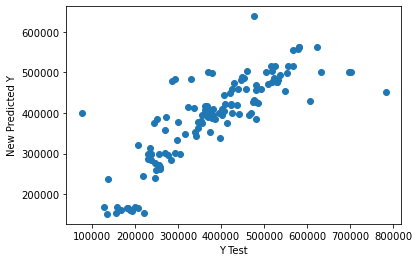

In [20]:
# test model
predictions2 = lm2.predict(X_test2)

# plot test and predicted values
plt.scatter(y_test2,predictions2)
plt.xlabel('Y Test')
plt.ylabel('New Predicted Y')

# print metrics
print('R Squared: ', metrics.r2_score(y_test2, predictions2))
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

_____
### Conclusions
- 67% of the observed variations can be explained by the new model.
- All metrics has improved after normalising predictor values. 
- `Distance to Metro` has a coefficient furthest away from 0, hence has the biggest weightage in determining `house price`.